# 2021/10/12
# 本代码绘制逐侯的流场及降水叠加图，取四侯23、25、27、30

In [1]:
import os
import sys
import xarray as xr
import numpy as np
module_path = ["/home/sun/mycode/module/","/data5/2019swh/mycode/module/"]
sys.path.append(module_path[0])
from module_sun import *
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from metpy.units import units
from matplotlib.path import Path
import matplotlib.patches as patches

# 处理成侯平均并保存

In [2]:
'''path  =  "/home/sun/qomo-data/zhuang_plev/"
path2 =  "/home/sun/data/"
file  =  ["plev_con_U.nc","plev_con_V.nc"]
exp   =  ["ic","id","con","icid"]

for name in exp:
    f0    =  xr.open_dataset(path+"plev_"+name+"_U.nc")
    f1    =  xr.open_dataset(path+"plev_"+name+"_V.nc")
    f2 =  xr.open_dataset(path+"famil_zhuang_"+name+"_prect.nc") 

    u     =  f0.U.data
    v     =  f1.V.data
    prect =  f2.prect.data

    time  =  np.linspace(1,73,73)  

    u_pen =  np.zeros((time.shape[0],u.shape[1],u.shape[2],u.shape[3]))
    v_pen =  u_pen.copy()
    prect_pen  = np.zeros((time.shape[0],prect.shape[1],prect.shape[2]))

    for i in range(0,73):
        u_pen[i,:]  =  np.average(u[i*5:i*5+5,:],axis=0) 
        v_pen[i,:]  =  np.average(v[i*5:i*5+5,:],axis=0)
        prect_pen[i,:]  =  np.average(prect[i*5:i*5+5,:],axis=0)

    u_file  =  xr.Dataset(
    {
        "u_pen":(["time","lev","lat","lon"],u_pen),
    },
    coords={
        "lon":(["lon"],f0.lon.data),
        "lat":(["lat"],f0.lat.data),
        "lev":(["lev"],f0.lev.data),
        "time":(["time"],time),
    },
    )
    u_file.u_pen.attrs  =  f0.U.attrs
    u_file.lev.attrs    =  f0.lev.attrs
    u_file.lat.attrs    =  f0.lat.attrs
    u_file.lon.attrs    =  f0.lon.attrs
    u_file.u_pen.attrs["units"]  =  "m/s"
    u_file.to_netcdf(path2+"pentad_average/plev_pentad_"+name+"_U.nc")

    v_file  =  xr.Dataset(
    {
        "v_pen":(["time","lev","lat","lon"],v_pen),
    },
    coords={
        "lon":(["lon"],f1.lon.data),
        "lat":(["lat"],f1.lat.data),
        "lev":(["lev"],f1.lev.data),
        "time":(["time"],time),
    },
    )
    v_file.v_pen.attrs  =  f1.V.attrs
    v_file.lev.attrs    =  f1.lev.attrs
    v_file.lat.attrs    =  f1.lat.attrs
    v_file.lon.attrs    =  f1.lon.attrs
    v_file.v_pen.attrs["units"]  =  "m/s"
    v_file.to_netcdf(path2+"pentad_average/plev_pentad_"+name+"_V.nc")

    prect_file  =  xr.Dataset(
    {
        "prect_pen":(["time","lat","lon"],prect_pen),
    },
    coords={
        "lon":(["lon"],f2.lon.data),
        "lat":(["lat"],f2.lat.data),
        "time":(["time"],time),
    },
    )
    prect_file.prect_pen.attrs  =  f2.prect.attrs
    prect_file.lat.attrs    =  f2.lat.attrs
    prect_file.lon.attrs    =  f2.lon.attrs
    prect_file.prect_pen.attrs["units"]  =  "mm/day"
    prect_file.to_netcdf(path2+"pentad_average/plev_pentad_"+name+"_prect.nc")'''

     

'path  =  "/home/sun/qomo-data/zhuang_plev/"\npath2 =  "/home/sun/data/"\nfile  =  ["plev_con_U.nc","plev_con_V.nc"]\nexp   =  ["ic","id","con","icid"]\n\nfor name in exp:\n    f0    =  xr.open_dataset(path+"plev_"+name+"_U.nc")\n    f1    =  xr.open_dataset(path+"plev_"+name+"_V.nc")\n    f2 =  xr.open_dataset(path+"famil_zhuang_"+name+"_prect.nc") \n\n    u     =  f0.U.data\n    v     =  f1.V.data\n    prect =  f2.prect.data\n\n    time  =  np.linspace(1,73,73)  \n\n    u_pen =  np.zeros((time.shape[0],u.shape[1],u.shape[2],u.shape[3]))\n    v_pen =  u_pen.copy()\n    prect_pen  = np.zeros((time.shape[0],prect.shape[1],prect.shape[2]))\n\n    for i in range(0,73):\n        u_pen[i,:]  =  np.average(u[i*5:i*5+5,:],axis=0) \n        v_pen[i,:]  =  np.average(v[i*5:i*5+5,:],axis=0)\n        prect_pen[i,:]  =  np.average(prect[i*5:i*5+5,:],axis=0)\n\n    u_file  =  xr.Dataset(\n    {\n        "u_pen":(["time","lev","lat","lon"],u_pen),\n    },\n    coords={\n        "lon":(["lon"],f0.lon

# 读取侯平均数据并画图

## 画图共用设置

In [3]:
'''设置绘图区域'''
lonmin,lonmax,latmin,latmax  =  60,120,0,30
extent     =  [lonmin,lonmax,latmin,latmax]
tmin,tmax  =  120,150 
level      =  925
pentads    =  ["p23","p25","p27","p30"]

#绘制长方形
verts = [[(90., 8.),(110.,8.), (110.,21.),(90., 21.),(0., 0.),],[(67., 4.),(90.,4.), (90.,25.),(67., 25.),(0., 0.),]]

codes = [Path.MOVETO,Path.LINETO,Path.LINETO,Path.LINETO,Path.CLOSEPOLY,]
props = dict(boxstyle='square', facecolor='white', alpha=1)

## 先处理con实验

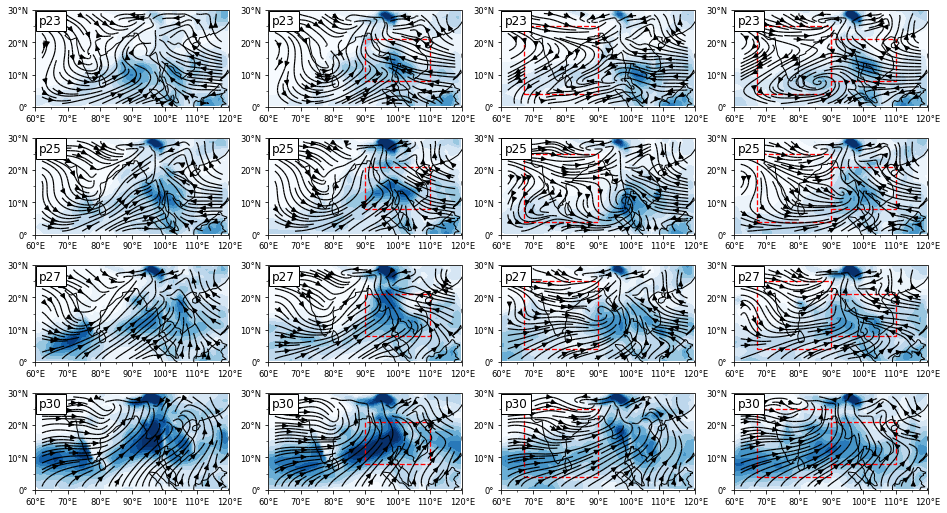

In [4]:
levs        =  [925]
time_slice  =  [23,25,27,30] 

path  =  "/home/sun/qomo-data/zhuang_plev/pentad_average/"
test  =  xr.open_dataset(path+"plev_pentad_con_U.nc")
u     =  xr.open_dataset(path+"plev_pentad_con_U.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))  #注意这里的time是从1开始的，所以21就是21侯
v     =  xr.open_dataset(path+"plev_pentad_con_V.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))
prect =  xr.open_dataset(path+"plev_pentad_con_prect.nc").sel(time=time_slice,lat=slice(0,30),lon=slice(60,120))

proj    =  ccrs.PlateCarree()
fig1    =  plt.figure(figsize=(16,9)) ; fig1.tight_layout()
spec1   =  fig1.add_gridspec(nrows=4,ncols=4)

os.system("mkdir -p /home/sun/paint/pentad_stream_prect")
for row in range(0,4):
    ax = fig1.add_subplot(spec1[row,0],projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    
    im  =  ax.contourf(prect.lon,prect.lat,prect.prect_pen.data[row,:],levels=np.linspace(2,20,10),cmap='Blues',alpha=1,extend='both')
    ax.streamplot(u.lon.data, u.lat.data, 
                  u.u_pen.data[row,:], v.v_pen.data[row,:], 
                  color='k',linewidth=1.2,
                 density=1)
    ax.text(0.02,0.85,pentads[row],transform=ax.transAxes,bbox=props,fontsize=12)


u     =  xr.open_dataset(path+"plev_pentad_ic_U.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))  #注意这里的time是从1开始的，所以21就是21侯
v     =  xr.open_dataset(path+"plev_pentad_ic_V.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))
prect =  xr.open_dataset(path+"plev_pentad_ic_prect.nc").sel(time=time_slice,lat=slice(0,30),lon=slice(60,120))

for row in range(0,4):
    ax = fig1.add_subplot(spec1[row,1],projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    path_m  =  Path(verts[0],codes)
    patch = patches.PathPatch(path_m, edgecolor='red', lw=1.3,linestyle='--',alpha=1,facecolor='None')
    ax.add_patch(patch)
    
    im  =  ax.contourf(prect.lon,prect.lat,prect.prect_pen.data[row,:],levels=np.linspace(2,20,10),cmap='Blues',alpha=1,extend='both')
    ax.streamplot(u.lon.data, u.lat.data, 
                  u.u_pen.data[row,:], v.v_pen.data[row,:], 
                  color='k',linewidth=1.2,
                 density=1)
    ax.text(0.02,0.85,pentads[row],transform=ax.transAxes,bbox=props,fontsize=12)




u     =  xr.open_dataset(path+"plev_pentad_id_U.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))  #注意这里的time是从1开始的，所以21就是21侯
v     =  xr.open_dataset(path+"plev_pentad_id_V.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))
prect =  xr.open_dataset(path+"plev_pentad_id_prect.nc").sel(time=time_slice,lat=slice(0,30),lon=slice(60,120))

for row in range(0,4):
    ax = fig1.add_subplot(spec1[row,2],projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    path_m  =  Path(verts[1],codes)
    patch = patches.PathPatch(path_m, edgecolor='red', lw=1.3,linestyle='--',alpha=1,facecolor='None')
    ax.add_patch(patch)
    
    im  =  ax.contourf(prect.lon,prect.lat,prect.prect_pen.data[row,:],levels=np.linspace(2,20,10),cmap='Blues',alpha=1,extend='both')
    ax.streamplot(u.lon.data, u.lat.data, 
                  u.u_pen.data[row,:], v.v_pen.data[row,:], 
                  color='k',linewidth=1.2,
                 density=1)
    ax.text(0.02,0.85,pentads[row],transform=ax.transAxes,bbox=props,fontsize=12)

    
    

u     =  xr.open_dataset(path+"plev_pentad_icid_U.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))  #注意这里的time是从1开始的，所以21就是21侯
v     =  xr.open_dataset(path+"plev_pentad_icid_V.nc").sel(lev=levs[0],time=time_slice,lat=slice(0,30),lon=slice(60,120))
prect =  xr.open_dataset(path+"plev_pentad_icid_prect.nc").sel(time=time_slice,lat=slice(0,30),lon=slice(60,120))

for row in range(0,4):
    ax = fig1.add_subplot(spec1[row,3],projection=proj)
    ax.coastlines(resolution='110m',lw=1)
    # 设置经纬度刻度.
    set_map_ticks(ax, dx=10, dy=10, nx=1, ny=1, labelsize='small')
    ax.set_extent(extent, crs=proj)
    path_m  =  Path(verts[0],codes)
    patch = patches.PathPatch(path_m, edgecolor='red', lw=1.3,linestyle='--',alpha=1,facecolor='None')
    ax.add_patch(patch)
    path_m  =  Path(verts[1],codes)
    patch = patches.PathPatch(path_m, edgecolor='red', lw=1.3,linestyle='--',alpha=1,facecolor='None')
    ax.add_patch(patch)
    
    im  =  ax.contourf(prect.lon,prect.lat,prect.prect_pen.data[row,:],levels=np.linspace(2,20,10),cmap='Blues',alpha=1,extend='both')
    ax.streamplot(u.lon.data, u.lat.data, 
                  u.u_pen.data[row,:], v.v_pen.data[row,:], 
                  color='k',linewidth=1.2,
                 density=1)
    ax.text(0.02,0.85,pentads[row],transform=ax.transAxes,bbox=props,fontsize=12)

    
    

plt.savefig('/home/sun/paint/pentad_stream_prect/pentad_stream_prect.pdf', bbox_inches='tight',dpi=1200)
plt.show()

